In [1]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.filters import median, gaussian
import bm3d
import numpy as np
from skimage.restoration import denoise_tv_chambolle

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import scipy.io

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

print(signaltonoise(gaussian_using_cv2))

[[0.121348   0.121348   0.121348  ]
 [0.11964986 0.11964986 0.11964986]
 [0.14420826 0.14420826 0.14420826]
 [1.57019393 1.57019393 1.57019393]
 [1.52844148 1.52844148 1.52844148]
 [1.52385739 1.52385739 1.52385739]
 [1.53962495 1.53962495 1.53962495]
 [1.57787778 1.57787778 1.57787778]
 [1.62029421 1.62029421 1.62029421]
 [1.66293315 1.66293315 1.66293315]
 [1.70785281 1.70785281 1.70785281]
 [1.75329778 1.75329778 1.75329778]
 [1.79698683 1.79698683 1.79698683]
 [1.8427493  1.8427493  1.8427493 ]
 [1.88686456 1.88686456 1.88686456]
 [1.92623792 1.92623792 1.92623792]
 [1.96658097 1.96658097 1.96658097]
 [2.0066174  2.0066174  2.0066174 ]
 [2.04374926 2.04374926 2.04374926]
 [2.07664872 2.07664872 2.07664872]
 [2.11376271 2.11376271 2.11376271]
 [2.15300374 2.15300374 2.15300374]
 [2.18702103 2.18702103 2.18702103]
 [2.21942337 2.21942337 2.21942337]
 [2.2610991  2.2610991  2.2610991 ]
 [2.31123756 2.31123756 2.31123756]
 [2.35811368 2.35811368 2.35811368]
 [2.39576343 2.39576343 2.39

In [7]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

print(PSNR(img, gaussian_using_cv2))

40.76832248177738


#### NLM - Non local means

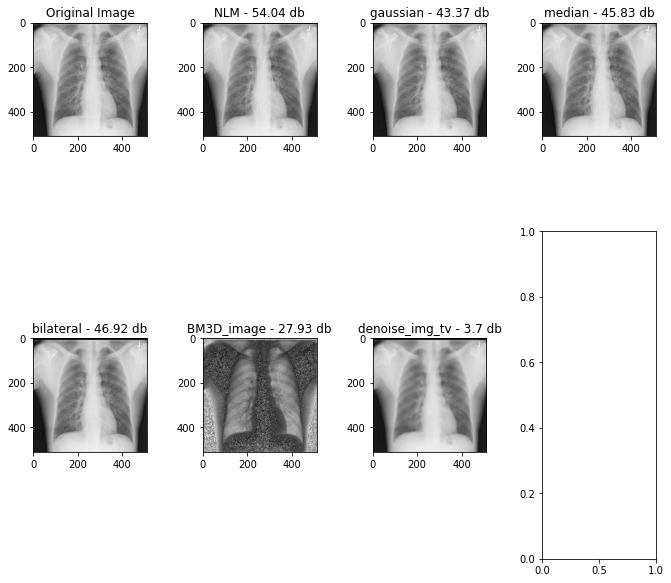

In [23]:
pic = 'G:\\PYTHON\\FinalYr_Phase-2\\Normal\\Normal-53.png'
img_gaussian_noise = img_as_float(io.imread(pic, as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread(pic, as_gray=True))

img = img_gaussian_noise

sigma_est = np.mean(estimate_sigma(img, multichannel=True))
#sigma_est = 0.1

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=5, patch_distance=3, multichannel=False)

denoise_img_as_8byte = img_as_ubyte(denoise_img)
final = cv2.cvtColor(denoise_img_as_8byte, cv2.COLOR_BGR2RGB)
img = img_as_ubyte(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#gaussian
gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT)
cv2.imwrite('gaussia.png',gaussian_using_cv2)

#Median
median_using_cv2 = cv2.medianBlur(img, 3)
cv2.imwrite('median.png',median_using_cv2)

#Bilaternal
bilateral_using_cv2 = cv2.bilateralFilter(img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)
cv2.imwrite('bilateral.png',bilateral_using_cv2)

#B3D
BM3D_denoised_image = bm3d.bm3d(img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
BM3D_denoised_image = (BM3D_denoised_image * 255).astype(np.uint8)
cv2.imwrite('B3D.png',BM3D_denoised_image)

#Total Variance
denoise_img_tv = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)
cv2.imwrite('denoise.png',denoise_img_tv)

PSNR(img, gaussian_using_cv2)
#PLOTTING

f, axarr = plt.subplots(2,4, figsize=(10, 10))
axarr[0,0].imshow(img)
axarr[0, 0].set_title('Original Image')
axarr[0,1].imshow(final)
axarr[0, 1].set_title('NLM - {} db'.format(round(PSNR(img, final),2)))
axarr[0,2].imshow(gaussian_using_cv2)
axarr[0, 2].set_title('gaussian - {} db'.format(round(PSNR(img, gaussian_using_cv2),2)))
axarr[0,3].imshow(median_using_cv2)
axarr[0, 3].set_title('median - {} db'.format(round(PSNR(img, median_using_cv2),2)))
axarr[1,0].imshow(bilateral_using_cv2)
axarr[1, 0].set_title('bilateral - {} db'.format(round(PSNR(img, bilateral_using_cv2),2)))
axarr[1,1].imshow(BM3D_denoised_image)
axarr[1, 1].set_title('BM3D_image - {} db'.format(round(PSNR(img, BM3D_denoised_image),2)))
axarr[1,2].imshow(denoise_img_tv)
axarr[1, 2].set_title('denoise_img_tv - {} db'.format(round(PSNR(img, denoise_img_tv),2)))
f.tight_layout(pad=3.0)